In [28]:
import pandas as pd
import numpy as np

np.random.seed(1212)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
import keras.utils
from keras.utils import to_categorical
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as pt

In [29]:
df_train = pd.read_csv('MNIST/train.csv')
df_test = pd.read_csv('MNIST/test.csv')

In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train = df_train["label"]
X_train = df_train.drop(labels = ["label"],axis = 1) 

In [7]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
df_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
X_train=X_train/255.0
df_test=df_test/255.0

In [12]:
X_train=X_train.values.reshape(-1,28,28,1)
df_test=df_test.values.reshape(-1,28,28,1)

In [13]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=2)

Epoch 1/10
70/70 [==============================] - 3s 35ms/step - loss: 0.9338 - val_loss: 0.1634
Epoch 2/10
70/70 [==============================] - 2s 35ms/step - loss: 0.3356 - val_loss: 0.1364
Epoch 3/10
70/70 [==============================] - 3s 36ms/step - loss: 0.2008 - val_loss: 0.1425
Epoch 4/10
70/70 [==============================] - 3s 36ms/step - loss: 0.1607 - val_loss: 0.1136
Epoch 5/10
70/70 [==============================] - 3s 37ms/step - loss: 0.1348 - val_loss: 0.1127
Epoch 6/10
70/70 [==============================] - 3s 36ms/step - loss: 0.1218 - val_loss: 0.1043
Epoch 7/10
70/70 [==============================] - 3s 37ms/step - loss: 0.1277 - val_loss: 0.1030
Epoch 8/10
70/70 [==============================] - 3s 38ms/step - loss: 0.1117 - val_loss: 0.1026
Epoch 9/10
70/70 [==============================] - 3s 37ms/step - loss: 0.1091 - val_loss: 0.1062
Epoch 10/10
70/70 [==============================] - 3s 38ms/step - loss: 0.1093 - val_loss: 0.1021


<AxesSubplot:title={'center':'MAE'}>

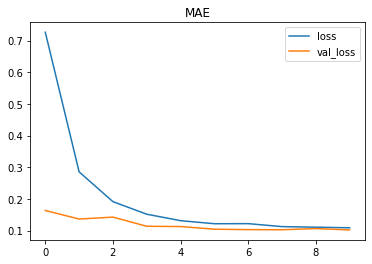

In [30]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=1, 
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
    ])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=512,
    epochs=10,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="MAE")
